# **ASSESSMENT CARGOS ANALÍTICOS**

##CASO DE CONSULTORIA


Suponga que la data que proces´o anteriormente pertenece a una empresa que
vende neveras portatiles. Haga un modelo que explique las ventas a trav´es de las variables de medios incluidas en los archivos adjuntos. Incluya otras variables que considere relevantes o que pueden afectar a las ventas de una compa˜nia que vende neveras portatiles.
Adicionalmente, incluya un documento en el que explique su modelo e interprete los resultados.



In [58]:
# ========== Librerias ===============================
import numpy as np
import pandas as pd
from sklearn import preprocessing
from numpy.core.numeric import NaN
!pip install fitter
from fitter import Fitter

import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import style
import seaborn as sns


#=================== ingresar la ruta de archivo CSV ==========================
data = pd.read_csv('/text.txt', sep=";")
df = pd.DataFrame(data)
df

,Geography,Period,Product,VariableName,VariableVelue
0,NaN,01/01/2018,NaN,campaigns_sent_per_week,4
1,NaN,01/01/2018,NaN,database_size,348944
2,NaN,01/01/2018,NaN,email_send_volume,1395776
3,NaN,01/01/2018,NaN,promo,no
4,NaN,01/04/2021,NaN,campaigns_sent_per_week,3
...,...,...,...,...,...
4593,East North Central,12/31/2018,Hard Cooler,sellthru_units,4
4594,East North Central,12/31/2018,Hard Cooler,sellthru_units,5
4595,East North Central,12/31/2018,Hard Cooler,sellthru_units,6
4596,East North Central,12/31/2018,Hard Cooler,sellthru_units,8


### Exploracion de datos (Fase de comprension de datos)
*En esta seccion se muestra un analisis descriptivo inicial de los datos del caso de estudio, jusnto con los primeros pasos de limpieza de datos. Para el analisis se realizaron algunas agrupaciones con el fin de identificar correlacion entre datos.*

In [59]:
uniqueValues = df['Product'].unique()
uniqueValues

array([nan, 'Hard Coolers', 'Hard coolers', 'Hard Cooler'], dtype=object)

In [60]:
uniqueValues = df['Geography'].unique()
uniqueValues

array([nan, '* TOTAL US', 'CHATTANOOGA', 'East North Central'],
      dtype=object)

In [61]:
df.Product = df.Product.replace({"Hard coolers": "Hard Coolers", "Hard Cooler": "Hard Coolers"})

In [62]:
df['Period'] = pd.to_datetime(df['Period'])
df

,Geography,Period,Product,VariableName,VariableVelue
0,NaN,2018-01-01,NaN,campaigns_sent_per_week,4
1,NaN,2018-01-01,NaN,database_size,348944
2,NaN,2018-01-01,NaN,email_send_volume,1395776
3,NaN,2018-01-01,NaN,promo,no
4,NaN,2021-01-04,NaN,campaigns_sent_per_week,3
...,...,...,...,...,...
4593,East North Central,2018-12-31,Hard Coolers,sellthru_units,4
4594,East North Central,2018-12-31,Hard Coolers,sellthru_units,5
4595,East North Central,2018-12-31,Hard Coolers,sellthru_units,6
4596,East North Central,2018-12-31,Hard Coolers,sellthru_units,8


In [63]:
estadisticos = df.describe()
estadisticos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Geography,Period,Product,VariableName,VariableVelue
count,3403,4598,3922,4598,4598
unique,3,187,1,17,1041
top,East North Central,2021-01-01 00:00:00,Hard Coolers,sellthru_units,3
freq,3122,97,3922,3122,218
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2021-05-10 00:00:00,NaN,NaN,NaN


### Preparacion de datos (Fase de preparacion de datos)
*En esta seccion se pretende realizar un menejo de datos NULL en los parametros que no permiten este tipo de datos. Para esto se realizara una transformacion de los datos categoricos para un mejor manejo y un areduccion de las carateristicas principales*

### Manejo de valores perdidos
Para manejar los valores Null aplicaremos la "lógica de relleno" seguida de la asignación de un valor por defecto para los valores nulos que puedan seguir existiendo, para asegurarnos de que todos ellos han sido sustituidos adecuadamente:

In [64]:
#<Comentario> Seleccion de Caracteristicas (Features)  

print("Acontinucaiocn se muestran los estadisticos de las variables cuantitativas")
estadisticos = df.describe()

null_df = df.isnull().sum()
print("Numero de Null values en cada columna:\n{}".format(null_df))

Acontinucaiocn se muestran los estadisticos de las variables cuantitativas
Numero de Null values en cada columna:
Geography        1195
Period              0
Product           676
VariableName        0
VariableVelue       0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


In [65]:
df["Geography"].fillna("Not Geography", inplace = True)
df["Product"].fillna("Whitout Product", inplace = True)

### Variables numéricas

In [66]:
#<COMENTARIO>--- Variables numéricas
# ==============================================================================

for item, information in  df.groupby("VariableName"): 
  try:
    information["VariableVelue"] = information["VariableVelue"].astype(float)
    print(item, "\n{}".format(information.select_dtypes(include=['float64', 'int']).describe()))
  except:
    pass

  #information.plot(x="fecha", y= columnSum, marker="*", title = item, figsize=(15,4))


campaigns_sent_per_week 
       VariableVelue
count     169.000000
mean        3.769231
std         1.484042
min         0.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        10.000000
database_size 
       VariableVelue
count   1.690000e+02
mean    1.844993e+06
std     7.957443e+05
min     0.000000e+00
25%     1.212830e+06
50%     1.799280e+06
75%     2.509020e+06
max     4.014430e+06
dols 
       VariableVelue
count      55.000000
mean    28144.672727
std     94734.094602
min         0.000000
25%       676.000000
50%      1547.000000
75%      8923.500000
max    591089.000000
email_send_volume 
       VariableVelue
count   1.690000e+02
mean    6.925460e+06
std     4.101073e+06
min     0.000000e+00
25%     3.680674e+06
50%     6.194398e+06
75%     9.245427e+06
max     2.266362e+07
hh_grp 
       VariableVelue
count      33.000000
mean        1.057576
std         2.186897
min         0.000000
25%         0.100000
50%         0.400000
75%         0.700000
max

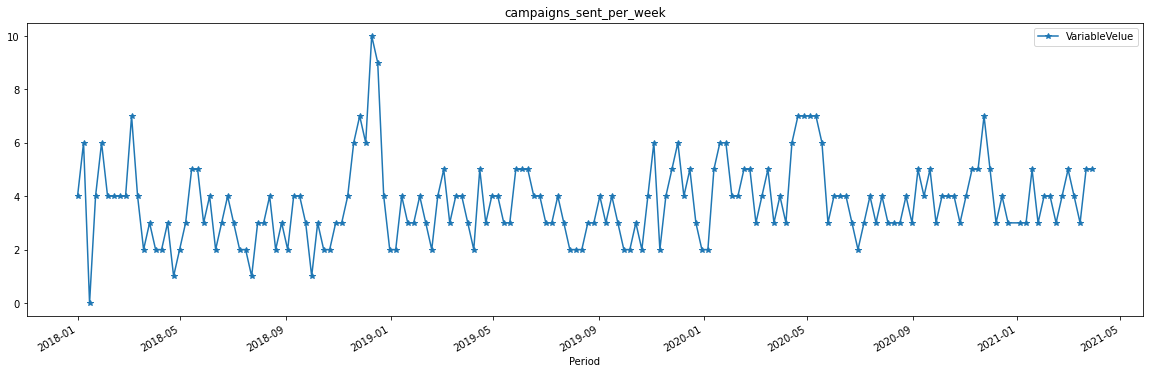

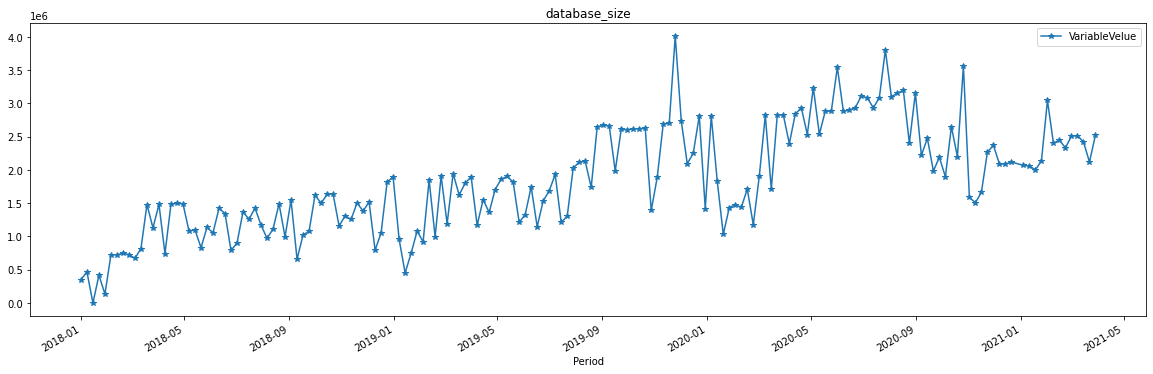

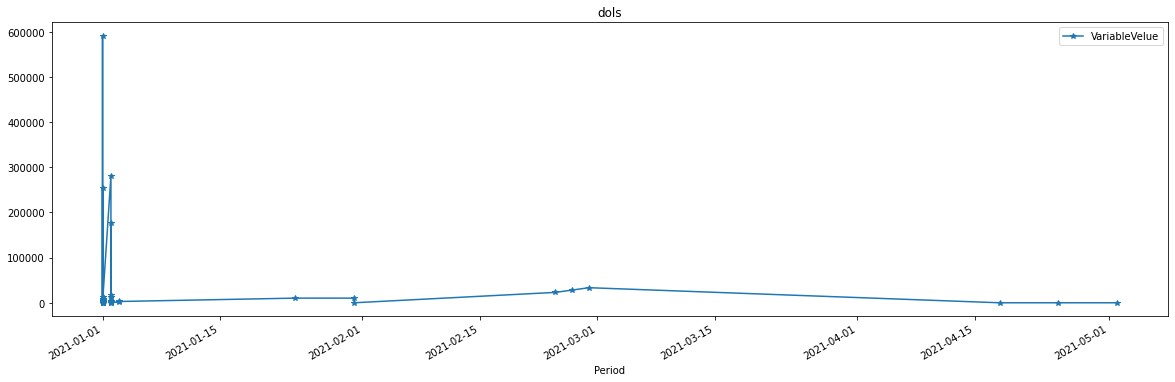

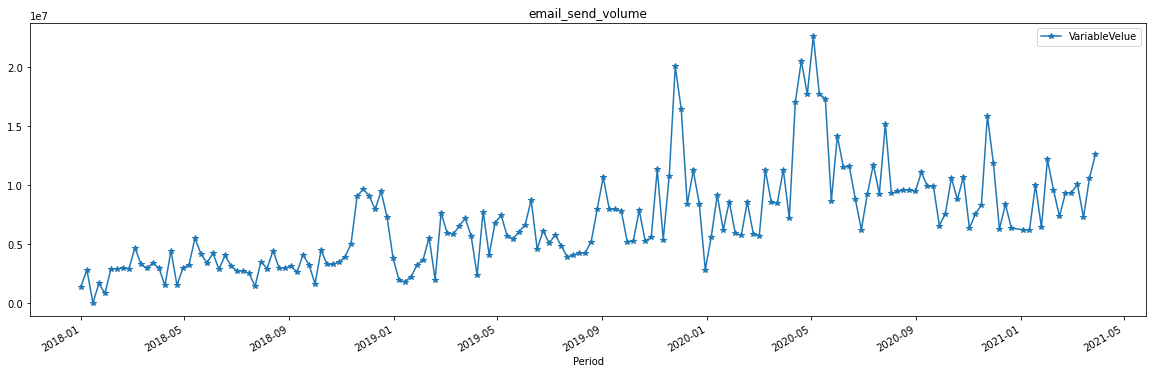

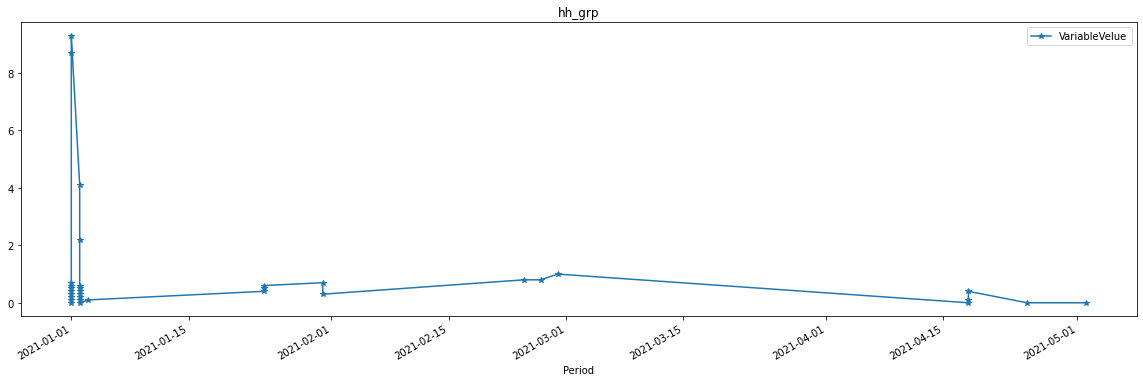

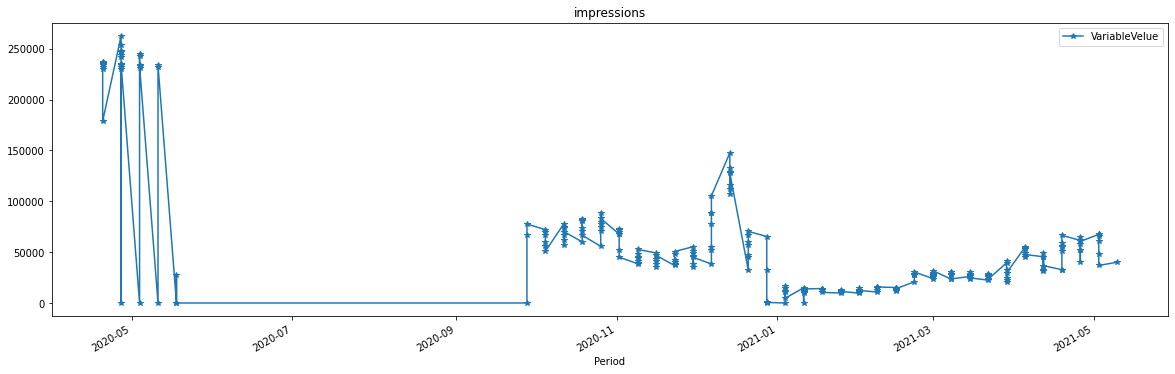

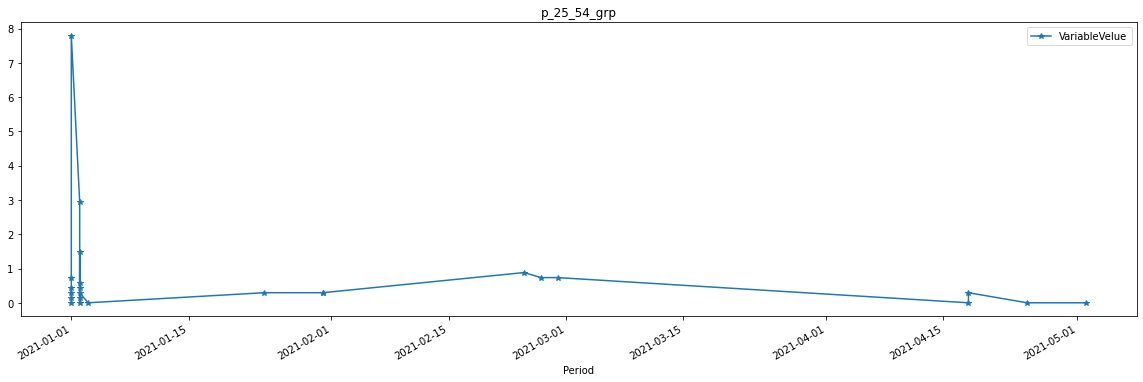

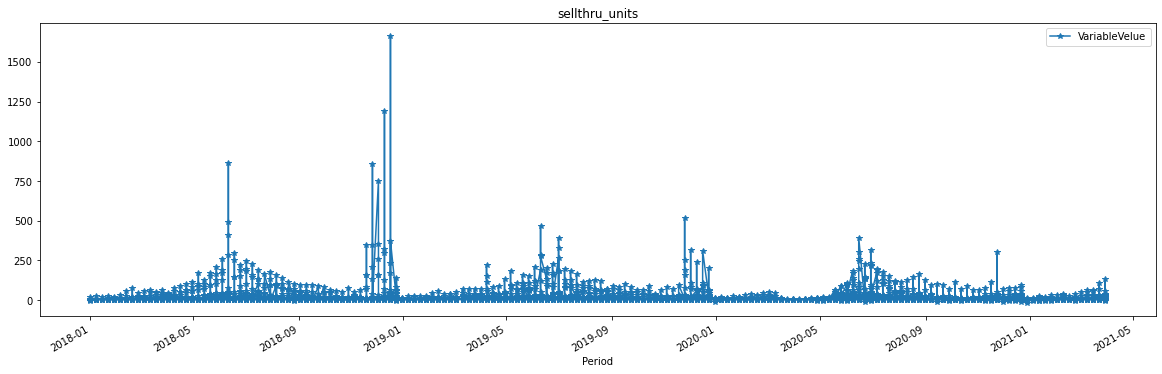

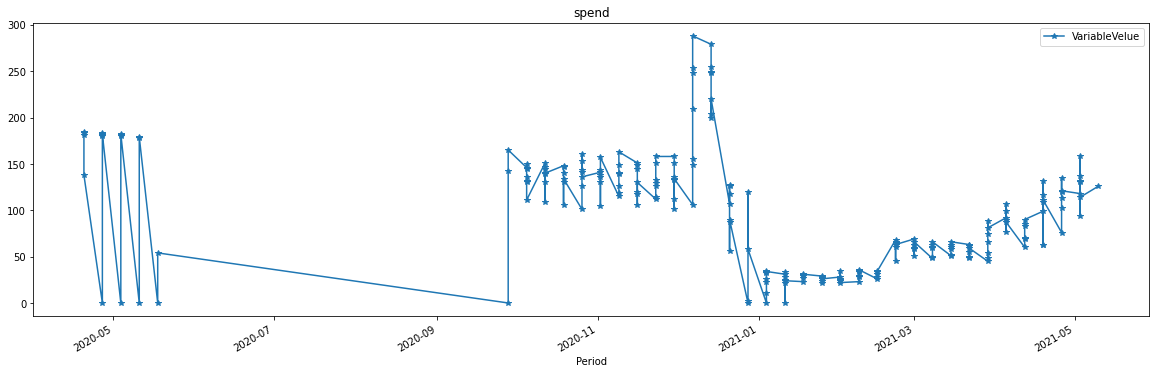

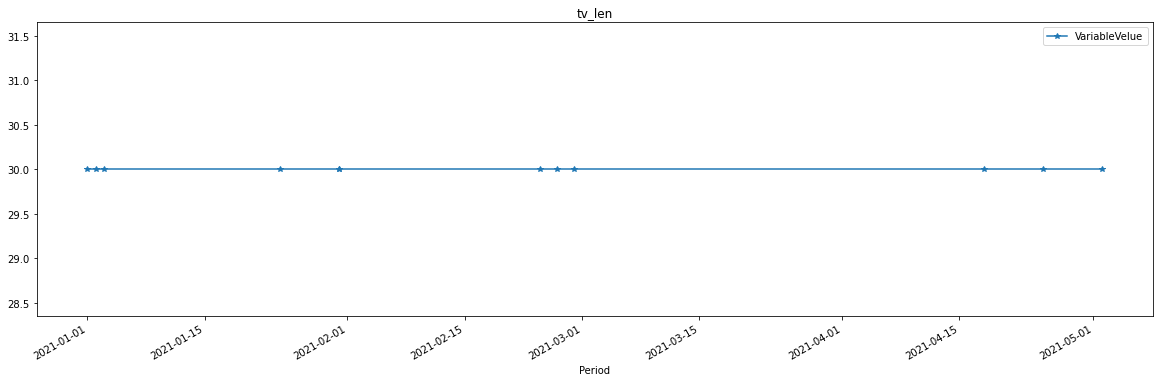

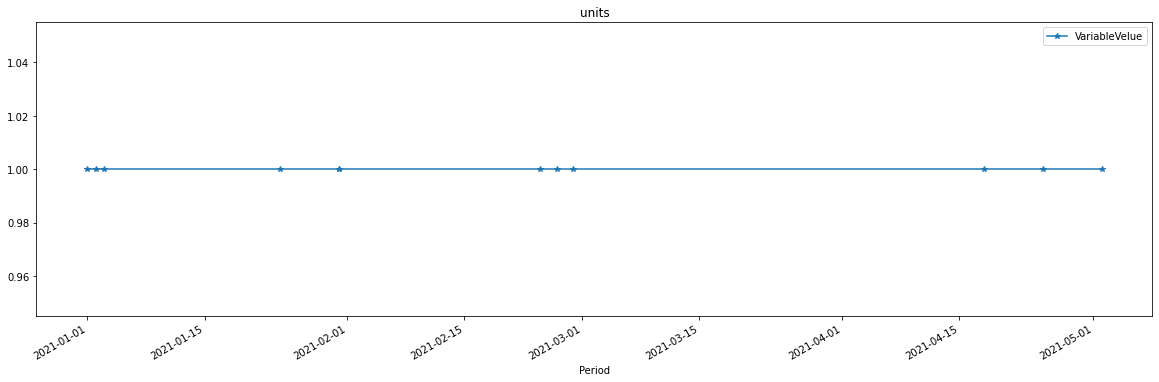

In [79]:
#<COMENTARIO>--- Variables numéricas
# ==============================================================================

for item, information in  df.groupby("VariableName"): 
  try:
    information["VariableVelue"] = information["VariableVelue"].astype(float)
    information.plot(x="Period", y= "VariableVelue", marker="*", title = item, figsize=(20,6))
  except:
    pass

### Variable respuesta
En este caso es posible ver que la variable respuesta es el numero de pares vendidos

In [68]:
df_pivot = df.pivot_table(index = ["Geography",	"Period",	"Product"]	, 
                          columns='VariableName', values='VariableVelue', aggfunc=list)

In [69]:
df_pivot

VariableName                          campaigns_sent_per_week  ... units
Geography     Period     Product                               ...      
* TOTAL US    2021-01-01 Hard Coolers                     NaN  ...   [1]
              2021-01-02 Hard Coolers                     NaN  ...   [1]
              2021-01-03 Hard Coolers                     NaN  ...   [1]
              2021-01-24 Hard Coolers                     NaN  ...   [1]
              2021-01-31 Hard Coolers                     NaN  ...   [1]
...                                                       ...  ...   ...
Not Geography 2021-04-12 Hard Coolers                     NaN  ...   NaN
              2021-04-19 Hard Coolers                     NaN  ...   NaN
              2021-04-26 Hard Coolers                     NaN  ...   NaN
              2021-05-03 Hard Coolers                     NaN  ...   NaN
              2021-05-10 Hard Coolers                     NaN  ...   NaN

[389 rows x 17 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

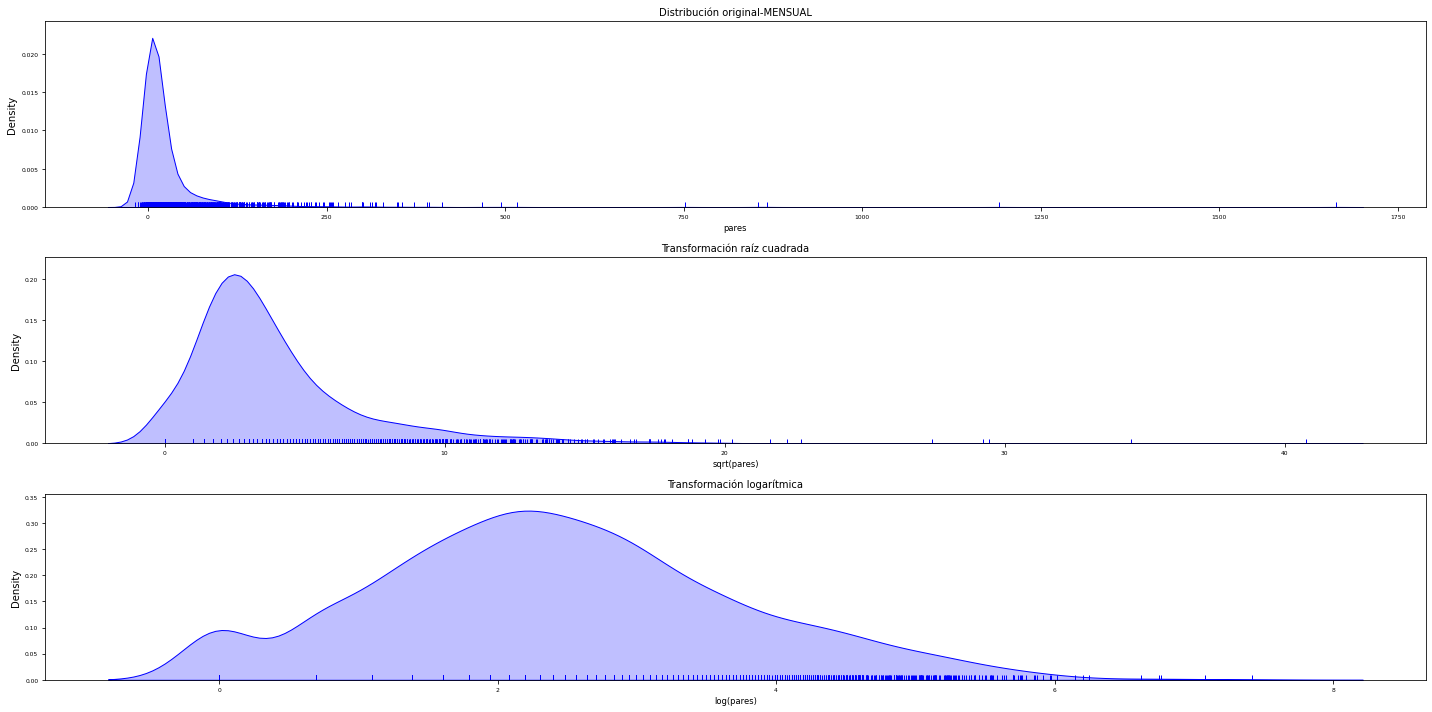

In [76]:
def graficarDistribuciones (dataFrame, columna):
  """Grafica la variable obetivo decaurdo a distribuciones comunes"""
  dataFrame[columna].astype(float)
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
  sns.distplot(
      dataFrame[columna],
      hist    = False,
      rug     = True,
      color   = "blue",
      kde_kws = {'shade': True, 'linewidth': 1},
      ax      = axes[0]
  )
  axes[0].set_title("Distribución original-MENSUAL", fontsize = 'medium')
  axes[0].set_xlabel('pares', fontsize='small') 
  axes[0].tick_params(labelsize = 6)

  sns.distplot(
      np.sqrt(dataFrame[columna].astype(float)),
      hist    = False,
      rug     = True,
      color   = "blue",
      kde_kws = {'shade': True, 'linewidth': 1},
      ax      = axes[1]
  )
  axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
  axes[1].set_xlabel('sqrt(pares)', fontsize='small') 
  axes[1].tick_params(labelsize = 6)

  sns.distplot(
      np.log(dataFrame[columna].astype(float)),
      hist    = False,
      rug     = True,
      color   = "blue",
      kde_kws = {'shade': True, 'linewidth': 1},
      ax      = axes[2]
  )
  axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
  axes[2].set_xlabel('log(pares)', fontsize='small') 
  axes[2].tick_params(labelsize = 6)

  fig.tight_layout()
  
graficarDistribuciones(df[df["VariableName"]=="sellthru_units"], "VariableVelue")

In [78]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df[df["VariableName"]=="sellthru_units"].VariableVelue.astype(float), distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)
# APARECE EN ORDEN DE LA QUE MAS SE ASEMEJA A LA QUE MENOS

,sumsquare_error,aic,bic,kl_div
cauchy,0.000187,2410.761653,-51907.921971,inf
chi2,0.000677,7334.099201,-47879.866941,inf
beta,0.000696,7066.411520,-47787.805144,inf
logistic,0.000718,10102.622949,-47702.729455,inf
expon,0.000996,4674.655763,-46683.233173,inf
exponpow,0.001119,7478.297550,-46312.382458,inf
norm,0.001130,22948.798201,-46290.025844,inf
powerlaw,0.001337,1619.374778,-45754.731827,inf
gamma,0.001593,59503.638757,-45208.775806,inf


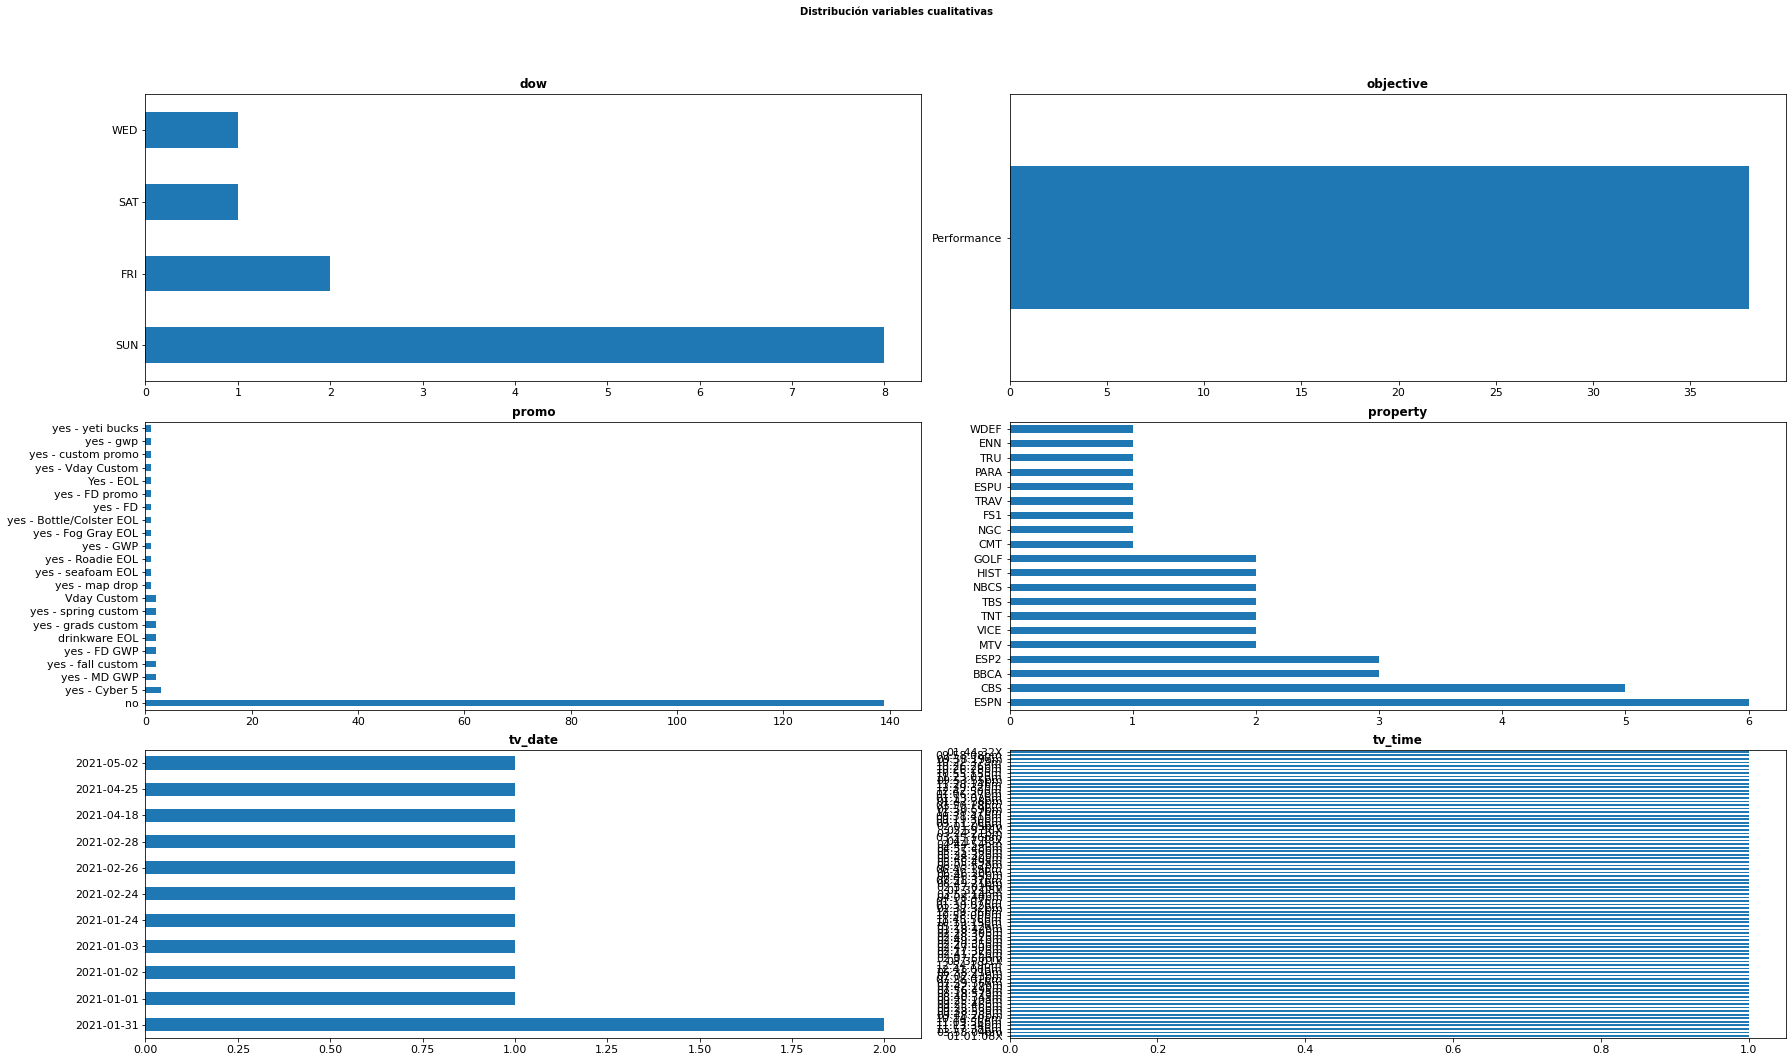

In [87]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))
axes = axes.flat
i = 0

for item, information in  df.groupby("VariableName"): 
  try:
    information["VariableVelue"] = information["VariableVelue"].astype(float)
  except:
    
    
    information["VariableVelue"].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(item, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    i = i+1
    
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");